In [1]:
#file for developing functions and other code

In [2]:
data_dir = "data/raw_training/training_data"

In [2]:
import helpers.input_processor as ip 

data_dir = "data/raw_training/training_data"
cache_dir = 'data'

df = ip.loadTrainingData(data_dir, cache_dir, encode_data=False)

loading data from save file:  data/ingested_data.json


In [ ]:
df

In [22]:
import helpers.input_processor as ip
import polars as pl
import numpy as np

#group trogether subjects for which the below features are identical
features = ['recording_location', 'age', 'sex']

filteredData = (
    df.groupby(['murmur_in_recording', *features]).agg([
        pl.count(),
        pl.col('audio_file').list()
    ])
    .groupby(features).agg([
        pl.col(['murmur_in_recording', 'count', 'audio_file']).list()
    ])
    .filter(pl.col('count').arr.lengths()==2)
    .sort(pl.col('count').arr.min(), reverse=True)
    .with_row_count('r_index')
)

filteredData

r_index,recording_location,age,sex,murmur_in_recording,count,audio_file
u32,str,str,str,list [str],list [u32],list [list [str]]
0,"""TV""","""Child""","""Male""","[""Present"", ""Absent""]","[54, 248]","[[""13918_TV.wav"", ""14241_TV.wav"", ... ""85172_TV.wav""], [""14998_TV.wav"", ""40798_TV.wav"", ... ""9983_TV.wav""]]"
1,"""TV""","""Child""","""Female""","[""Absent"", ""Present""]","[232, 53]","[[""23625_TV.wav"", ""24160_TV.wav"", ... ""85335_TV.wav""], [""29045_TV.wav"", ""33151_TV.wav"", ... ""9979_TV.wav""]]"
2,"""MV""","""Child""","""Female""","[""Absent"", ""Present""]","[249, 52]","[[""23625_MV.wav"", ""24160_MV.wav"", ... ""85336_MV.wav""], [""29045_MV.wav"", ""33151_MV.wav"", ... ""9979_MV.wav""]]"
3,"""MV""","""Child""","""Male""","[""Absent"", ""Present""]","[269, 51]","[[""13918_MV.wav"", ""14998_MV.wav"", ... ""9983_MV.wav""], [""14241_MV.wav"", ""46065_MV.wav"", ... ""85172_MV.wav""]]"
4,"""PV""","""Child""","""Male""","[""Absent"", ""Present""]","[252, 49]","[[""13918_PV.wav"", ""14998_PV.wav"", ... ""9983_PV.wav""], [""14241_PV.wav"", ""46065_PV.wav"", ... ""85172_PV.wav""]]"
5,"""PV""","""Child""","""Female""","[""Absent"", ""Present""]","[241, 47]","[[""23625_PV.wav"", ""24160_PV.wav"", ... ""85345_PV.wav""], [""29045_PV.wav"", ""49572_PV.wav"", ... ""9979_PV.wav""]]"
6,"""AV""","""Child""","""Female""","[""Present"", ""Absent""]","[44, 246]","[[""29045_AV.wav"", ""49595_AV.wav"", ... ""9979_AV.wav""], [""23625_AV.wav"", ""24160_AV.wav"", ... ""85345_AV.wav""]]"
7,"""AV""","""Child""","""Male""","[""Absent"", ""Present""]","[258, 38]","[[""13918_AV.wav"", ""14998_AV.wav"", ... ""9983_AV.wav""], [""14241_AV.wav"", ""46065_AV.wav"", ... ""85172_AV.wav""]]"
8,"""MV""","""Infant""","""Female""","[""Absent"", ""Present""]","[40, 15]","[[""49607_MV.wav"", ""49622_MV.wav"", ... ""85300_MV.wav""], [""49824_MV.wav"", ""49900_MV.wav"", ... ""85339_MV.wav""]]"


In [282]:
#choose which group to analyze (by index)
selectedRow = filteredData.slice(2,1)

#get relevant audio files (including presence of a murmur) for the selected set of data
comparableData = pl.DataFrame(
    data = selectedRow.get_column('audio_file').to_list(),
    columns = selectedRow.get_column('murmur_in_recording')[0].to_list()
)
#choose equal amounts of audio files for both 'Absent' and 'Present' cases
x = min(comparableData.select(pl.all().arr.lengths()).row(0))
comparableData = comparableData.with_column(
    pl.all()
    .arr.eval(pl.element().slice(0,x))
).explode(pl.all())

comparableData

Absent,Present
str,str
"""23625_MV.wav""","""29045_MV.wav"""
"""24160_MV.wav""","""33151_MV.wav"""
"""2530_MV.wav""","""47002_MV.wav"""
"""29378_MV.wav""","""49572_MV.wav"""
"""31737_MV.wav""","""49595_MV.wav"""
"""38337_MV.wav""","""49627_MV.wav"""
"""39043_MV.wav""","""49754_MV.wav"""
"""39403_MV.wav""","""49821_MV.wav"""
"""39456_MV.wav""","""49850_MV.wav"""


In [266]:
# y = selectedRow.select(pl.col('audio_file').arr.eval(pl.element().apply(lambda x: len(x)))).row(0)
y = selectedRow.select(pl.col('audio_file').arr.eval(pl.element().arr.lengths())).row(0)[0]
y = selectedRow.select(pl.col('audio_file').arr.lengths())

y

AttributeError: 'ExprListNameSpace' object has no attribute 'arr'

In [277]:
# x = out.select(pl.all().apply(lambda x: len(x))).row(0)
# x = min(x)

x = min(out.select(pl.all().arr.lengths()).row(0))


test = selectedRow.with_column(
    pl.col('audio_file')
    .arr.eval(pl.element().arr.slice(0,x))
)
test
# test.select(pl.col('audio_file').arr.eval(pl.element().arr.lengths()))

r_index,recording_location,age,sex,murmur_in_recording,count,audio_file
u32,str,str,str,list [str],list [u32],list [list [str]]
2,"""MV""","""Child""","""Female""","[""Absent"", ""Present""]","[249, 52]","[[""23625_MV.wav"", ""24160_MV.wav"", ... ""50263_MV.wav""], [""29045_MV.wav"", ""33151_MV.wav"", ... ""9979_MV.wav""]]"


In [210]:
x = selectedRow.get_column('audio_file').arr.eval(pl.element().arr.lengths().min())[0][0]
(
    selectedRow.get_column('audio_file')
    .arr.eval(
        pl.element().slice(0,x)
    )
)


shape: (1,)
Series: 'audio_file' [list]
[
	[["23625_MV.wav", "24160_MV.wav", ... "85336_MV.wav"], ["29045_MV.wav", "33151_MV.wav", ... "9979_MV.wav"]]
]

In [213]:
selectedRow.get_column('audio_file').explode()


shape: (6,)
Series: 'audio_file' [list]
[
	["23625_MV.wav", "24160_MV.wav", ... "85336_MV.wav"]
	["29045_MV.wav", "33151_MV.wav", ... "9979_MV.wav"]
	["13918_MV.wav", "14998_MV.wav", ... "9983_MV.wav"]
	["14241_MV.wav", "46065_MV.wav", ... "85172_MV.wav"]
	["13918_PV.wav", "14998_PV.wav", ... "9983_PV.wav"]
	["14241_PV.wav", "46065_PV.wav", ... "85172_PV.wav"]
]

In [18]:
import polars as pl

features = ['murmur_in_patient', 'age', 'height']
out = df.select(['spectrogram', *features])

out

spectrogram,murmur_in_patient,age,height
str,f64,f64,f64
"""data/spectrograms/13918_AV.npy""",1.0,312.0,98.0
"""data/spectrograms/13918_PV.npy""",1.0,312.0,98.0
"""data/spectrograms/13918_TV.npy""",1.0,312.0,98.0
"""data/spectrograms/13918_MV.npy""",1.0,312.0,98.0
"""data/spectrograms/14241_AV.npy""",1.0,312.0,87.0
"""data/spectrograms/14241_PV.npy""",1.0,312.0,87.0
"""data/spectrograms/14241_TV.npy""",1.0,312.0,87.0
"""data/spectrograms/14241_MV.npy""",1.0,312.0,87.0
"""data/spectrograms/14998_AV.npy""",0.0,312.0,NaN


In [3]:
print(out.mean())
print(out.fill_nan(None).mean())

shape: (1, 4)
┌─────────────┬───────────────────┬─────┬────────┐
│ spectrogram ┆ murmur_in_patient ┆ age ┆ height │
│ ---         ┆ ---               ┆ --- ┆ ---    │
│ str         ┆ f64               ┆ f64 ┆ f64    │
╞═════════════╪═══════════════════╪═════╪════════╡
│ null        ┆ 0.219412          ┆ NaN ┆ NaN    │
└─────────────┴───────────────────┴─────┴────────┘
shape: (1, 4)
┌─────────────┬───────────────────┬────────────┬────────────┐
│ spectrogram ┆ murmur_in_patient ┆ age        ┆ height     │
│ ---         ┆ ---               ┆ ---        ┆ ---        │
│ str         ┆ f64               ┆ f64        ┆ f64        │
╞═════════════╪═══════════════════╪════════════╪════════════╡
│ null        ┆ 0.219412          ┆ 326.082763 ┆ 115.005342 │
└─────────────┴───────────────────┴────────────┴────────────┘


In [50]:
import polars as pl

df = pl.DataFrame({
    'a': [1.0, 2.0, 3.0, float('nan')],
    'b': [4.0, 4.5, 5.0, 6.0]
})

In [53]:
df.fill_nan(None).select([
    pl.sum('a').alias('sum'),
    pl.mean('a').alias('mean')
])

# df.fill_nan(None)

# df.select(pl.all().drop_nans())

sum,mean
f64,f64
6.0,2.0


In [3]:
import helpers.audio_tools as adt

spectro1 = adt.wav_to_spectro(data_dir + '/14998_TV.wav', sr=4000)
# spectro1 = spectro1[:,range(50)]
spectro1.shape

(1025, 213)

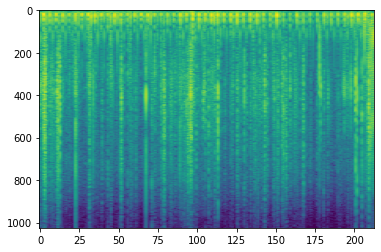

In [5]:
import matplotlib.pyplot as plt

plt.imshow(spectro1, aspect='auto')


In [6]:
import helpers.audio_tools as adt

spectro2 = adt.wav_to_spectro(data_dir + '/13918_TV.wav', sr=4000)
# spectro2 = spectro2[:,range(50)]
spectro2.shape

(1025, 52)

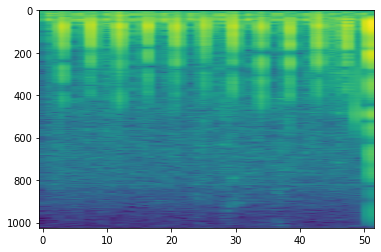

In [9]:
plt.imshow(spectro2, aspect='auto')


In [42]:
assert spectro1.all()==spectro2.all()

In [14]:
import helpers.audio_tools as adt

spectro = adt.wav_to_spectro(data_dir + '/13918_TV.wav', sr=4000)


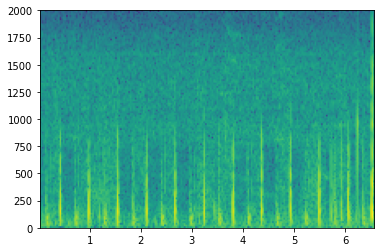

In [23]:
data_dir = "data/raw_training/training_data"


# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile

Fs, aud = wavfile.read(data_dir + '/13918_TV.wav')
# select left channel only
# aud = aud[:,0]
# trim the first 125 seconds
first = aud[:int(Fs*125)]

powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=4000)
plt.show()

In [29]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

#PURPOSE:   print a spectrogram
#PARAMS:    spectrogram     ndarray     spectrogram to print
#           sample_rate     int         sample rate of the wav file
#           title           str         [OPTIONAL] title of the printed spectrogram: str, default=None
#           y_type          str         [OPTIONAL] scale to use for the y axis: 'log' OR 'linear', default='log'
def print_spectro(spectrogram, sample_rate, name='default'):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis='linear', ax=ax)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    plt.savefig(name + '.png')

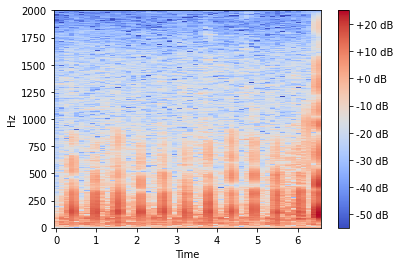

In [30]:
file = '13918_TV.wav'
spectro = adt.wav_to_spectro(data_dir + '/' + file, sr=4000)
print_spectro(spectro, 4000, name=)

In [28]:
plt.savefig('testdvdfihdf.png')
plt.show()

<Figure size 432x288 with 0 Axes>